# House Sales in King County - USA

## About Dataset

This dataset contains house sale prices for King County, which includes Seattle. 
It includes homes sold between May 2014 and May 2015.
It's a great dataset for evaluating simple regression models.

Variable	Description

id	Identification

date	Date sold

price	Sale price

bedrooms	Number of bedrooms

bathrooms	Number of bathrooms

sqft_liv	Size of living area in square feet

sqft_lot	Size of the lot in square feet

floors	Number of floors

waterfront	‘1’ if the property has a waterfront, ‘0’ if not.

view	An index from 0 to 4 of how good the view of the property was

condition	Condition of the house, ranked from 1 to 5

grade	Classification by construction quality which refers to the types of materials used and the quality of workmanship. 
Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. 
Additional information in: KingCounty

sqft_above	Square feet above ground

sqft_basmt	Square feet below ground

yr_built	Year built

yr_renov	Year renovated. ‘0’ if never renovated

zipcode	5 digit zip code

lat	Latitude

long	Longitude

squft_liv15	Average size of interior housing living space for the closest 15 houses, in square feet

squft_lot15	Average size of land lots for the closest 15 houses, in square feet

Shape_leng	Polygon length in meters

Shape_Area	Polygon area in meters

### Perguntas

#### 1 Quantas casas tem 1 quarto? (Feito)
#### 2 Quantas casas tem mais de 1 andar?

#### 3 quantas casas estão em boas ou más condições

#### 4 quantos quartos em média as casas possuem?

#### 5 qual o preço médio das casas?

#### 6 qual o desvio padrão do preço?

#### 7 Existem casas com preços outliers

#### 8 quais sao os 1Q e 3Q dos preços?

Download dataset kaggle: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("dados/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape[0]

21613

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df_data = df.date
df.drop(columns = 'date',inplace = True)

In [7]:
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## ask 1 - Quantas casas tem 1 quarto?

In [9]:
df_quartos = df.bedrooms.value_counts()
df_quartos.sort_index(ascending= True)

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [10]:
print(f'Casas com 1 quarto: {df_quartos[1]}')

Casas com 1 quarto: 199


## ask 2  - Quantas casas tem mais de 1 andar?

In [11]:
df_andares = df.floors.value_counts()
df_andares.sort_index(ascending=True, inplace = True)
df_andares

1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: floors, dtype: int64

In [12]:
print(f"Casas com mais de 1 andares {df_andares[1.5:].sum()}")

Casas com mais de 1 andares 10933


## ask 3 - quantas casas estão em boas ou más condições

In [13]:
df_condicoes = df.condition.value_counts()
df_condicoes.sort_index(ascending=True, inplace = True)
df_condicoes

1       30
2      172
3    14031
4     5679
5     1701
Name: condition, dtype: int64

In [14]:
# Boas condições recebe nota 3 até 5
print(f"Casas em boas condicões de nota 4 a 5: {df_condicoes[3:].sum()} casas")

Casas em boas condicões de nota 4 a 5: 7380 casas


In [15]:
# Más condicões recebem notas de 1 até 2
print(f"Casas em más condicões de nota 1 a 2: {df_condicoes[:2].sum()} casas")

Casas em más condicões de nota 1 a 2: 202 casas


## ask 4 - quantos quartos em média as casas possuem?

In [16]:
print(f'Média de {df.bedrooms.mean():.0f} quartos por casa')

Média de 3 quartos por casa


## ask 5 - qual o preço médio das casas?

In [17]:
print(f'Preço médio por casa ${df.price.mean():.2f} dólares')

Preço médio por casa $540088.14 dólares


## ask 6 -  qual o desvio padrão do preço?


In [18]:
print(F"Desvio padrao do preco {df.price.std():.3f}")

Desvio padrao do preco 367127.196


## Ask 7 - Existem casas com preços outliers?

In [19]:
df.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0.5, 1.0, 'Preços')

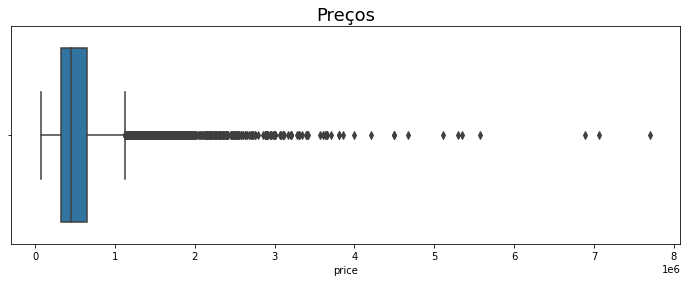

In [20]:
ax = sns.boxplot(x = 'price', data = df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title("Preços", fontsize = 18)

In [21]:
df.price.quantile([0.25, 0.50, 0.75, 1])

0.25     321950.0
0.50     450000.0
0.75     645000.0
1.00    7700000.0
Name: price, dtype: float64

In [22]:
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)
iqr = q3-q1
upper = q3+(1.5*iqr)
lower = q1-(1.5*iqr)
print(iqr, upper, lower)

323050.0 1129575.0 -162625.0


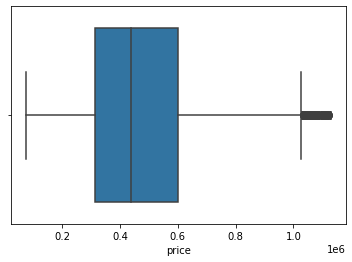

In [23]:
outlier = df.price[(df.price>= lower) & (df.price <= upper)]
ax.figure.set_size_inches(12,4)
ax = sns.boxplot(x = outlier, data = outlier, orient='h')
plt.show()

In [24]:
outlier.describe()

count    2.046700e+04
mean     4.769846e+05
std      2.083713e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.375000e+05
75%      6.000000e+05
max      1.127500e+06
Name: price, dtype: float64

In [25]:
pd.value_counts(outlier > 1000000), pd.value_counts(outlier < 200000)

(False    20148
 True       319
 Name: price, dtype: int64,
 False    19681
 True       786
 Name: price, dtype: int64)

#### Calculando novamente o desvio padrão

In [26]:
print(F"Desvio padrao do preco após remoção de alguns dados {outlier.std():.2f}")

Desvio padrao do preco após remoção de alguns dados 208371.26


In [27]:
outlier.std()

208371.26167027562

In [28]:
print(f" Quantidade de casas consideradas outliers após o filtro é de: {df.price.shape[0] - outlier.shape[0]}")

 Quantidade de casas consideradas outliers após o filtro é de: 1146


## Ask 8 - quais sao os 1Q e 3Q dos preços?

Text(0.5, 1.0, 'Q1 e Q3 dos preços')

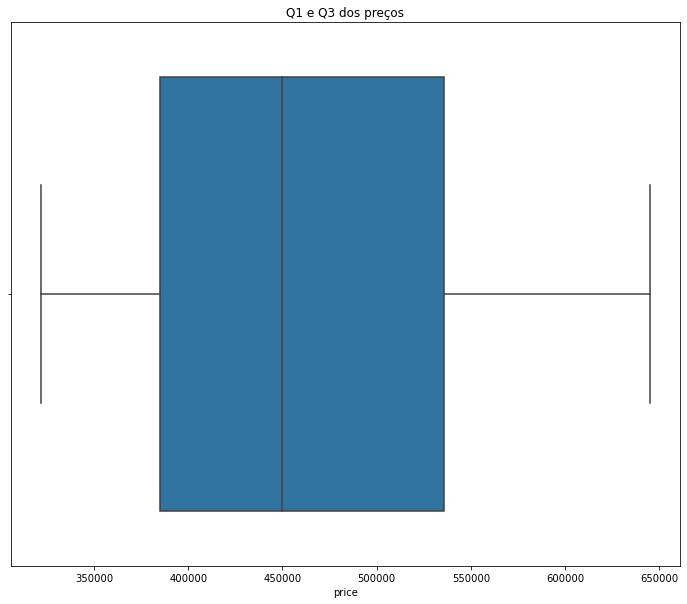

In [29]:
ax = sns.boxplot(x = 'price', data = df.query('price >= price.quantile(0.25) & price <= price.quantile(0.75)'), orient='h')
ax.figure.set_size_inches(12,10)
ax.set_title("Q1 e Q3 dos preços")

In [30]:
print(F"1 Quartil {df.price.quantile(0.25)} || 3 Quartil {df.price.quantile(0.75)}")

1 Quartil 321950.0 || 3 Quartil 645000.0


### Obs: tenho que manter padrões de nomeclatura para variáveis e comentarios, lembre-se !!!